In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('Numerical_train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,2,0,4,1,7,5,...,0,0,0,0,0,0,0,0,0,1
2,20,3,80.0,9600,2,0,4,1,6,8,...,0,0,0,0,0,0,0,0,0,1
3,60,3,68.0,11250,2,0,3,1,7,5,...,0,0,0,0,0,0,0,0,0,1
4,70,3,60.0,9550,2,0,3,1,7,5,...,0,0,0,0,0,0,0,0,0,1
5,60,3,84.0,14260,2,0,3,1,8,5,...,0,0,0,0,0,0,0,0,0,1


In [17]:
y = np.log(df['SalePrice'])
x = df.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [18]:
GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
cv_score = cross_val_score(GBR, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 0.14325212877756752


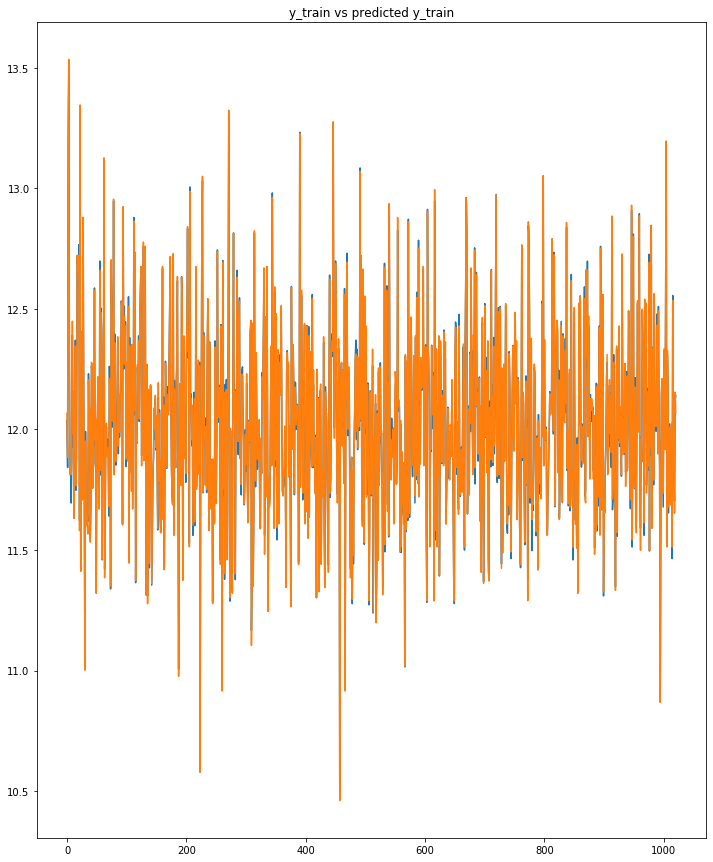

In [21]:
#visualization for y_train vs predicted y_train
GBR.fit(x_train, y_train)
pred_y_train = GBR.predict(x_train)
plt.subplots(figsize=(12,15))
plt.plot(pred_y_train)
plt.plot(y_train.values)
plt.title('y_train vs predicted y_train');

In [23]:
GBR.score(x_train, y_train)

0.994551331858372

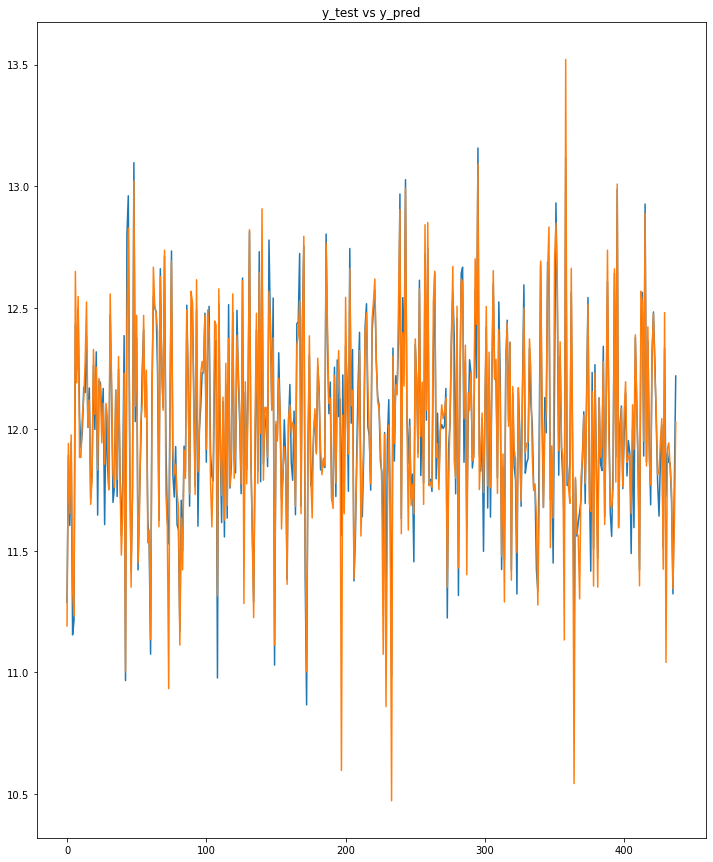

In [25]:
#visualization for y_test vs y_pred
y_pred = GBR.predict(x_test)
plt.subplots(figsize=(12,15))
plt.plot(y_pred)
plt.plot(y_test.values)
plt.title('y_test vs y_pred');

In [26]:
GBR.score(x_test, y_test)

0.8967830074283961

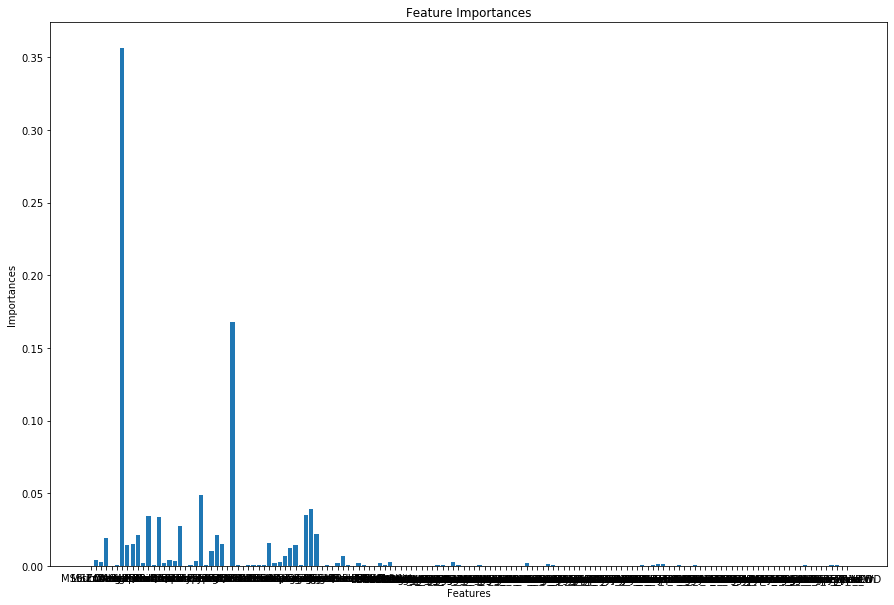

In [32]:
important_cols = x.columns[GBR.feature_importances_ > 0.0]
values = GBR.feature_importances_[GBR.feature_importances_ > 0.0]

plt.figure(figsize=(15,10))
plt.title("Feature Importances")
plt.bar(important_cols,values,align="center")
plt.xlabel('Features')
plt.ylabel('Importances');

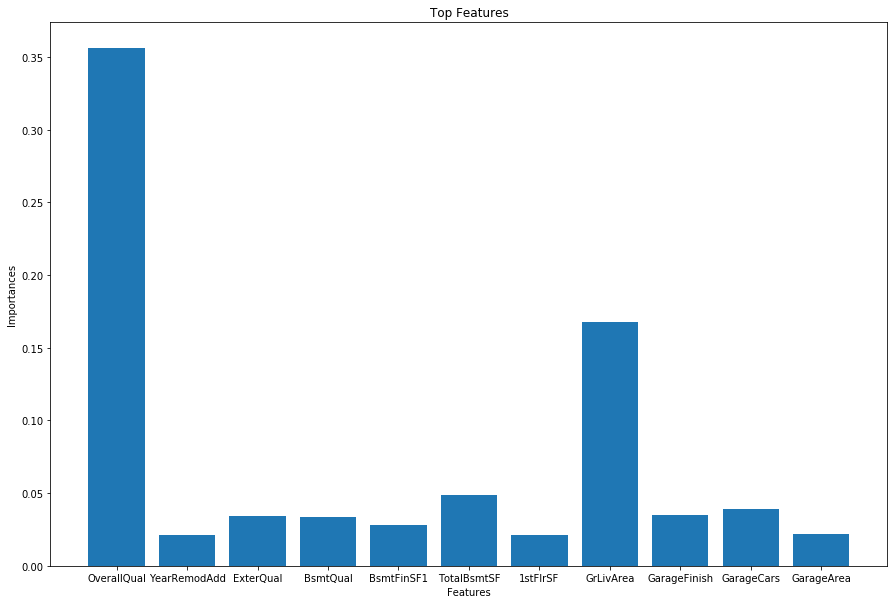

In [33]:
important_cols = x.columns[GBR.feature_importances_ > 0.02]
values = GBR.feature_importances_[GBR.feature_importances_ > 0.02]

plt.figure(figsize=(15,10))
plt.title("Top Features")
plt.bar(important_cols,values,align="center")
plt.xlabel('Features')
plt.ylabel('Importances');

In [36]:
(GBR.feature_importances_>0.02).sum()

11

In [34]:
x.loc[:,GBR.feature_importances_>0.02].columns

Index(['OverallQual', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [37]:
(GBR.feature_importances_>0.01).sum()

19

In [35]:
x.loc[:,GBR.feature_importances_>0.01].columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea'],
      dtype='object')